In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn



In [3]:
df = pd.read_csv("./data/ergbnisse/train_news_150.csv")

In [19]:
# Spalten extrahieren
min_kompressionsrate = df['Min_Kompressionsrate']
max_kompressionsrate = df['Max_Kompressionsrate']
desired_compression_rate = df['desired_compression_rate']

# Zeile hinzufügen, um den Bereich zu kennzeichnen
df['Bereich'] = ""
for i in range(len(df)):
    if desired_compression_rate[i] < min_kompressionsrate[i]:
        df.at[i, 'Bereich'] = 'Drunter'
    elif min_kompressionsrate[i] <= desired_compression_rate[i] <= max_kompressionsrate[i]:
        df.at[i, 'Bereich'] = 'Zwischen'
    else:
        df.at[i, 'Bereich'] = 'Drüber'


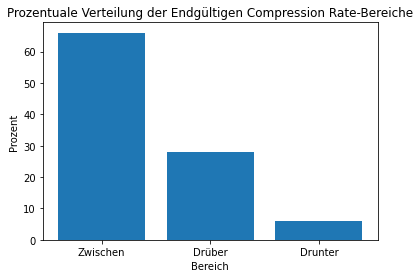

In [20]:
# Spalten extrahieren
min_kompressionsrate = df['Min_Kompressionsrate']
max_kompressionsrate = df['Max_Kompressionsrate']
endgueltige_kompressionsrate = df['Endgueltige_Kompressionsrate']

# Zeile hinzufügen, um den Bereich zu kennzeichnen
df['Bereich'] = ""
for i in range(len(df)):
    if endgueltige_kompressionsrate[i] < min_kompressionsrate[i]:
        df.at[i, 'Bereich'] = 'Drunter'
    elif min_kompressionsrate[i] <= endgueltige_kompressionsrate[i] <= max_kompressionsrate[i]:
        df.at[i, 'Bereich'] = 'Zwischen'
    else:
        df.at[i, 'Bereich'] = 'Drüber'

# Berechne die prozentualen Anteile der Bereiche
counts = df['Bereich'].value_counts(normalize=True) * 100

# Plot: Prozentuale Anteile der Bereiche
plt.bar(counts.index, counts.values)
plt.xlabel('Bereich')
plt.ylabel('Prozent')
plt.title('Prozentuale Verteilung der Endgültigen Compression Rate-Bereiche')
plt.show()

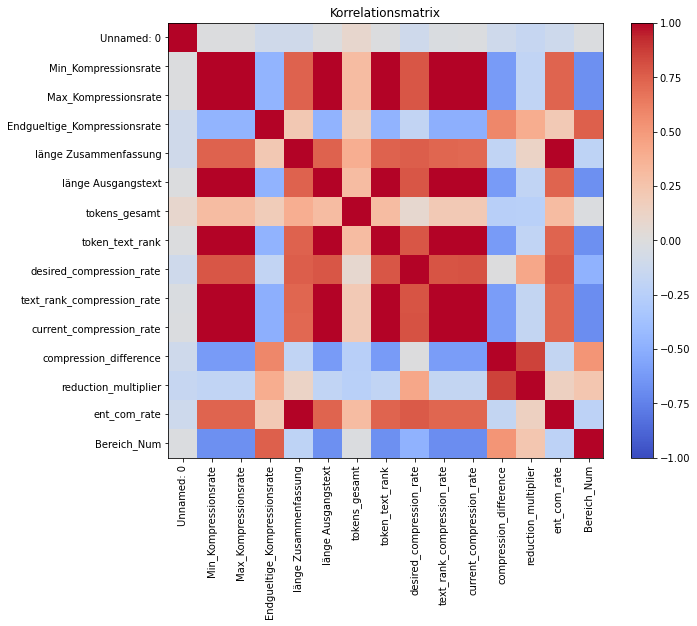

In [21]:
# Spalte "Bereich" in numerische Kategorien umwandeln
df['Bereich_Num'] = df['Bereich'].map({'Drunter': 0, 'Zwischen': 1, 'Drüber': 2})

# Korrelationsmatrix berechnen
correlation_matrix = df.corr()

# Plot: Korrelationsmatrix
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Korrelationsmatrix')
plt.show()

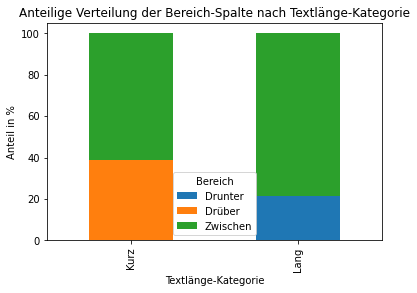

In [27]:
# Textlänge in Kategorien einteilen: lang und kurz
df['Textlänge_Kategorie'] = pd.cut(df['länge Ausgangstext'], bins=[0, 50, float('inf')], labels=['Kurz', 'Lang'])

# Verteilung der Bereich-Spalte nach Textlänge-Kategorie
verteilung = df.groupby(['Textlänge_Kategorie', 'Bereich'])['Bereich'].count().unstack()

# Anteilswerte berechnen
verteilung_prozent = verteilung.apply(lambda x: x / x.sum() * 100, axis=1)

# Plot: Verteilung der Bereich-Spalte nach Textlänge-Kategorie
verteilung_prozent.plot(kind='bar', stacked=True)
plt.xlabel('Textlänge-Kategorie')
plt.ylabel('Anteil in %')
plt.title('Anteilige Verteilung der Bereich-Spalte nach Textlänge-Kategorie')
plt.legend(title='Bereich')
plt.show()

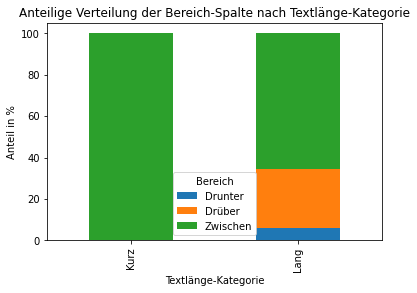

In [30]:
# Textlänge in Kategorien einteilen: lang und kurz
df['Textlänge_Kategorie'] = pd.cut(df['tokens_gesamt'], bins=[0, 50, float('inf')], labels=['Kurz', 'Lang'])

# Verteilung der Bereich-Spalte nach Textlänge-Kategorie
verteilung = df.groupby(['Textlänge_Kategorie', 'Bereich'])['Bereich'].count().unstack()

# Anteilswerte berechnen
verteilung_prozent = verteilung.apply(lambda x: x / x.sum() * 100, axis=1)

# Plot: Verteilung der Bereich-Spalte nach Textlänge-Kategorie
verteilung_prozent.plot(kind='bar', stacked=True)
plt.xlabel('Textlänge-Kategorie')
plt.ylabel('Anteil in %')
plt.title('Anteilige Verteilung der Bereich-Spalte nach Textlänge-Kategorie')
plt.legend(title='Bereich')
plt.show()

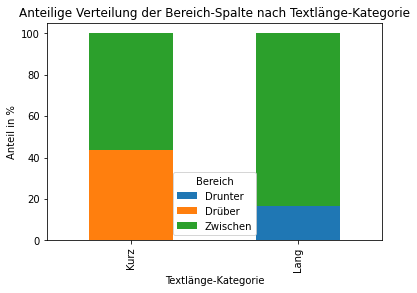

In [31]:
# Textlänge in Kategorien einteilen: lang und kurz
df['Textlänge_Kategorie'] = pd.cut(df['Min_Kompressionsrate'], bins=[0, 50, float('inf')], labels=['Kurz', 'Lang'])

# Verteilung der Bereich-Spalte nach Textlänge-Kategorie
verteilung = df.groupby(['Textlänge_Kategorie', 'Bereich'])['Bereich'].count().unstack()

# Anteilswerte berechnen
verteilung_prozent = verteilung.apply(lambda x: x / x.sum() * 100, axis=1)

# Plot: Verteilung der Bereich-Spalte nach Textlänge-Kategorie
verteilung_prozent.plot(kind='bar', stacked=True)
plt.xlabel('Textlänge-Kategorie')
plt.ylabel('Anteil in %')
plt.title('Anteilige Verteilung der Bereich-Spalte nach Textlänge-Kategorie')
plt.legend(title='Bereich')
plt.show()